In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

## Trying out multiple trajectories with Russ's example code and Pendulum env

In [4]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
)
from nn_system.networks import *


def make_mto():
    ###############################################
    # Construct the inital MathematicalProgram
    ###############################################
    num_trajectories = 16
    num_samples      = 16
    kMinimumTimeStep = 0.2
    kMaximumTimeStep = 0.5

    # ic_list = None
    # ic_list = [(0., 0.)]
    # ic_list = np.array([(0. + .1*ti, 0.0) for ti in range(num_trajectories)])
    ic_list = initial_conditions_grid(num_trajectories)

    # seed = 1776
    # seed = None
    # seed = np.random.randint(0, 2000); print("seed: {}".format(seed))
    seed = 1338
    mto = MultipleTrajOpt("pendulum",
                          num_trajectories, 
                          num_samples,
                          kMinimumTimeStep,
                          kMaximumTimeStep,
                          ic_list=ic_list,
                          warm_start=False,
                          seed=seed)


    ###############################################
    # Add a neural network!
    ###############################################
    # kNetConstructor = None
    # kNetConstructor = lambda: FC(2)
    kNetConstructor = lambda: FCBIG(2)
    # kNetConstructor = lambda: MLPSMALL(2)
    # kNetConstructor = lambda: MLP(2)
    reg_type = "No"
    # reg_type = "L1"
    # reg_type = "L2"
    if kNetConstructor is not None:
        mto.add_nn_params(kNetConstructor,
                      use_constraint = True, cost_factor = None,
                      initialize_params = True, 
                      reg_type          = reg_type)

    # Introduce a scaling factor in (0, 1] that can be used to shrink the initial
    # conditions regions used for policy rollouts, so we can check an area SMALLER
    # than that which was used for dircol calculations!
    scaling = 0.5
    # mto.add_multiple_trajectories_visualization_callback(vis_ic_list=None)
    mto.add_multiple_trajectories_visualization_callback(11, vis_ic_list=[])
    mto.add_cost_and_constraint_printing_callback(1)

    # Add in some SNOPT settings changes here!!!
    # Looks like we are getting good enough solutions!!!
    from pydrake.all import (SolverType)
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'Verify level', -1)
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Print file', "/tmp/snopt.out")

    mto.prog.SetSolverOption(SolverType.kSnopt, 'Major feasibility tolerance', 2.0e-2) # default="1.0e-6"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Major optimality tolerance',  2.0e-2) # default="1.0e-6"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Minor feasibility tolerance', 2.0e-3) # default="1.0e-6"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Minor optimality tolerance',  2.0e-3) # default="1.0e-6"

    # Lower if nonlinear constraint are cheap to evaluate, else higher...
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'Linesearch tolerance',  0.9) # default="0.9"

    mto.prog.SetSolverOption(SolverType.kSnopt, 'Major step limit',  0.1) # default="2.0e+0"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Time limit (secs)',  120.0) # default="9999999.0"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Reduced Hessian dimension',  10000) # Default="min{2000, n1 + 1}"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Hessian updates',  30) # Default="10"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Major iterations limit',  9300000) # Default="9300"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Minor iterations limit',  50000) # Default="500"
    mto.prog.SetSolverOption(SolverType.kSnopt, 'Iterations limit',  50*10000) # Default="10000"

    # mto.prog.SetSolverOption(SolverType.kSnopt, 'New superbasics limit',  99) # Default="99"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'Violation limit',  10.0) # Default="10.0"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'Superbasics limit',  5000) # Default="n1 + 1"


    # LUSOL Factorization options
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'LU factor tolerance', 3.99) # Default ="3.99"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'LU update tolerance', 3.99) # Default ="3.99"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'LU singularity tolerance', 3.2e-11) # Default ="3.2e-11"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'LU partial pivoting', True) # Default="*partial/rook/complete"

    # mto.prog.SetSolverOption(SolverType.kSnopt, 'Derivative linesearch', True) # Default="*Derivative/Nonderivative"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'Nonderivative linesearch', True) # Default="*Derivative/Nonderivative"

    # Factoriztion?
    mto.prog.SetSolverOption(SolverType.kSnopt, 'QPSolver Cholesky', True) # Default="*Cholesky/CG/QN"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'QPSolver CG', True) # Default="*Cholesky/CG/QN"
    # mto.prog.SetSolverOption(SolverType.kSnopt, 'QPSolver QN', True) # Default="*Cholesky/CG/QN"

    return mto

using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost factor:  1.0
using cost facto

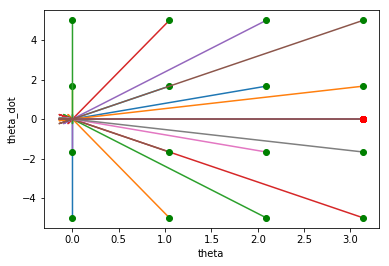

total cost:  3.78 | 	constraint  1425.84 	bad 32,  1293.91
 1total cost:  3.78 | 	constraint  1425.84 	bad 32,  1293.91
 2total cost:  286.91 | 	constraint  1266.68 	bad 95,  1105.65
 3total cost:  15.81 | 	constraint  1373.99 	bad 32,  1234.24
 4total cost:  79.59 | 	constraint  1348.06 	bad 32,  1204.50
 5total cost:  6.27 | 	constraint  1363.16 	bad 32,  1221.96
 6total cost:  202.97 | 	constraint  1222.90 	bad 90,  1054.44
 7total cost:  457.21 | 	constraint  1038.16 	bad 142,  831.68
 8total cost:  522.01 | 	constraint  950.87 	bad 142,  725.51
 9total cost:  607.50 | 	constraint  896.00 	bad 130,  652.95
 10total cost:  743.62 | 	constraint  851.93 	bad 128,  593.57
 11

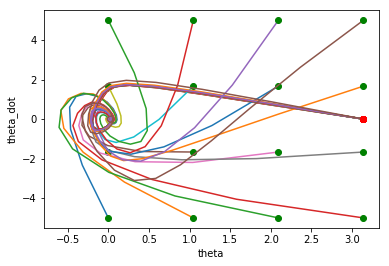

total cost:  930.79 | 	constraint  812.70 	bad 127,  539.46
 12total cost:  1183.41 | 	constraint  774.78 	bad 124,  485.14
 13total cost:  1487.79 | 	constraint  738.99 	bad 123,  433.17
 14total cost:  1830.34 | 	constraint  704.95 	bad 117,  382.99
 15total cost:  2204.71 | 	constraint  677.01 	bad 115,  334.81
 16total cost:  2604.65 | 	constraint  650.34 	bad 112,  287.43
 17total cost:  3039.41 | 	constraint  622.74 	bad 108,  238.96
 18total cost:  3473.96 | 	constraint  594.52 	bad 91,  190.01
 19total cost:  3876.46 | 	constraint  565.72 	bad 88,  144.62
 20total cost:  4252.23 | 	constraint  534.68 	bad 86,  98.62
 21total cost:  4568.13 | 	constraint  500.47 	bad 73,  50.20
 22

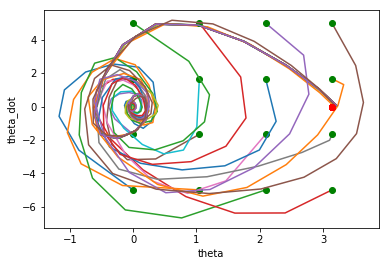

total cost:  4723.17 | 	constraint  465.65 	bad 22,  5.30
 23total cost:  4484.78 | 	constraint  451.99 	bad 0,  0.00
 24total cost:  4167.83 | 	constraint  446.59 	bad 0,  0.00
 25total cost:  3799.08 | 	constraint  438.98 	bad 3,  0.50
 26total cost:  3873.11 | 	constraint  429.68 	bad 4,  0.59
 27total cost:  3706.16 | 	constraint  433.52 	bad 3,  0.41
 28total cost:  3433.02 | 	constraint  426.40 	bad 4,  0.69
 29total cost:  3237.97 | 	constraint  417.35 	bad 6,  0.84
 30total cost:  3212.95 | 	constraint  407.60 	bad 0,  0.00
 31total cost:  3169.06 | 	constraint  404.17 	bad 0,  0.00
 32total cost:  3130.36 | 	constraint  404.10 	bad 0,  0.00
 33

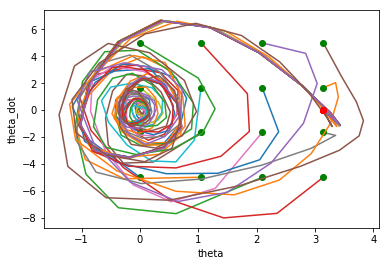

total cost:  3079.25 | 	constraint  403.06 	bad 0,  0.00
 34total cost:  2907.94 | 	constraint  401.16 	bad 0,  0.00
 35total cost:  3079.08 | 	constraint  402.93 	bad 0,  0.00
 36total cost:  3347.76 | 	constraint  399.30 	bad 6,  1.06
 37total cost:  2843.74 | 	constraint  399.29 	bad 0,  0.00
 38total cost:  2740.88 | 	constraint  395.86 	bad 2,  0.42
 39total cost:  2694.03 | 	constraint  392.05 	bad 0,  0.00
 40total cost:  2677.45 | 	constraint  391.63 	bad 0,  0.00
 41total cost:  2641.73 | 	constraint  390.65 	bad 0,  0.00
 42total cost:  2592.03 | 	constraint  388.35 	bad 0,  0.00
 43total cost:  2569.59 | 	constraint  387.25 	bad 0,  0.00
 44

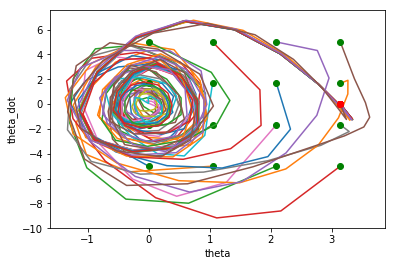

total cost:  2589.01 | 	constraint  388.52 	bad 3,  0.47
 45total cost:  2532.25 | 	constraint  386.45 	bad 0,  0.00
 46total cost:  2472.09 | 	constraint  385.06 	bad 0,  0.00
 47total cost:  2430.74 | 	constraint  384.49 	bad 0,  0.00
 48total cost:  2410.66 | 	constraint  383.95 	bad 0,  0.00
 49total cost:  2394.45 | 	constraint  383.11 	bad 0,  0.00
 50total cost:  2370.25 | 	constraint  382.18 	bad 0,  0.00
 51total cost:  2327.51 | 	constraint  380.35 	bad 0,  0.00
 52total cost:  2297.82 | 	constraint  377.76 	bad 0,  0.00
 53total cost:  2261.80 | 	constraint  377.94 	bad 1,  0.14
 54total cost:  2241.52 | 	constraint  374.62 	bad 0,  0.00
 55

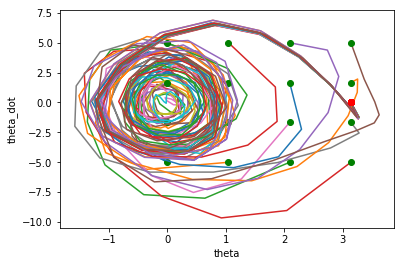

total cost:  2218.88 | 	constraint  373.45 	bad 0,  0.00
 56total cost:  2195.12 | 	constraint  371.95 	bad 0,  0.00
 57total cost:  2157.23 | 	constraint  370.79 	bad 4,  0.50
 58total cost:  2132.34 | 	constraint  364.64 	bad 0,  0.00
 59total cost:  2107.31 | 	constraint  362.65 	bad 0,  0.00
 60total cost:  2074.68 | 	constraint  359.89 	bad 0,  0.00
 61total cost:  2061.43 | 	constraint  356.44 	bad 0,  0.00
 62total cost:  2059.04 | 	constraint  355.16 	bad 0,  0.00
 63total cost:  2042.45 | 	constraint  353.64 	bad 0,  0.00
 64total cost:  2024.27 | 	constraint  352.31 	bad 0,  0.00
 65total cost:  2012.30 | 	constraint  351.40 	bad 0,  0.00
 66

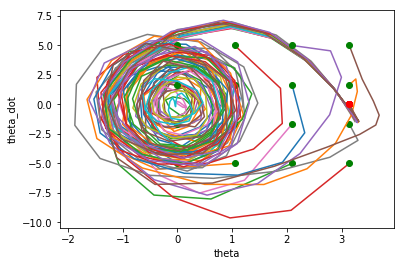

total cost:  2004.18 | 	constraint  350.94 	bad 0,  0.00
 67total cost:  1993.13 | 	constraint  351.42 	bad 0,  0.00
 68total cost:  1977.30 | 	constraint  353.30 	bad 0,  0.00
 69total cost:  1967.42 | 	constraint  353.96 	bad 0,  0.00
 70total cost:  1959.60 | 	constraint  353.67 	bad 0,  0.00
 71total cost:  1957.04 | 	constraint  353.48 	bad 0,  0.00
 72total cost:  2337.86 | 	constraint  353.58 	bad 3,  0.51
 73total cost:  1950.69 | 	constraint  353.16 	bad 0,  0.00
 74total cost:  2276.64 | 	constraint  353.32 	bad 3,  0.50
 75total cost:  1944.68 | 	constraint  352.76 	bad 0,  0.00
 76total cost:  1951.46 | 	constraint  352.34 	bad 0,  0.00
 77

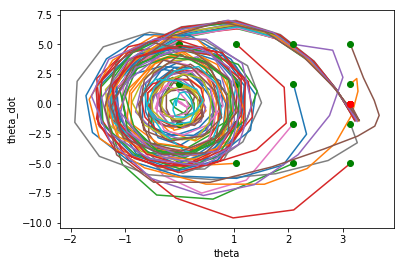

total cost:  1934.05 | 	constraint  352.27 	bad 0,  0.00
 78total cost:  2004.44 | 	constraint  352.23 	bad 0,  0.00
 79total cost:  1928.88 | 	constraint  351.98 	bad 0,  0.00
 80total cost:  1918.47 | 	constraint  351.39 	bad 0,  0.00
 81total cost:  1900.30 | 	constraint  350.82 	bad 2,  0.26
 82total cost:  1878.38 | 	constraint  348.90 	bad 3,  0.55
 83total cost:  1852.20 | 	constraint  349.34 	bad 8,  2.34
 84total cost:  1826.24 | 	constraint  348.66 	bad 9,  3.17
 85total cost:  1806.02 | 	constraint  345.69 	bad 5,  1.18
 86total cost:  1800.61 | 	constraint  345.12 	bad 4,  0.62
 87total cost:  1779.48 | 	constraint  343.25 	bad 0,  0.00
 88

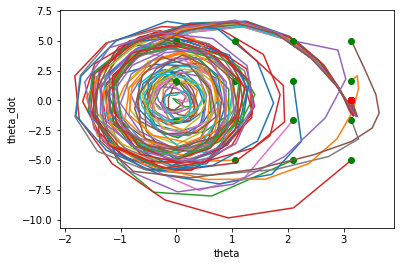

total cost:  1772.31 | 	constraint  342.51 	bad 0,  0.00
 89total cost:  1769.15 | 	constraint  342.34 	bad 0,  0.00
 90total cost:  1766.77 | 	constraint  342.79 	bad 0,  0.00
 91total cost:  1764.50 | 	constraint  343.61 	bad 0,  0.00
 92total cost:  1762.70 | 	constraint  343.92 	bad 0,  0.00
 93total cost:  1760.68 | 	constraint  344.36 	bad 0,  0.00
 94total cost:  1759.16 | 	constraint  345.12 	bad 0,  0.00
 95total cost:  1757.33 | 	constraint  344.78 	bad 0,  0.00
 96total cost:  1754.78 | 	constraint  345.64 	bad 0,  0.00
 97total cost:  1753.26 | 	constraint  344.82 	bad 0,  0.00
 98total cost:  1752.30 | 	constraint  344.87 	bad 0,  0.00
 99

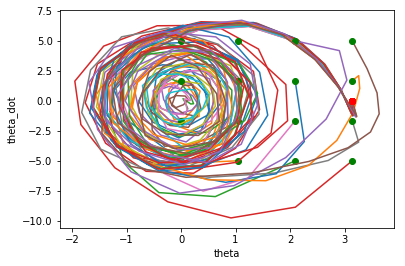

total cost:  1751.43 | 	constraint  344.85 	bad 0,  0.00
 100total cost:  1763.40 | 	constraint  351.90 	bad 17,  2.68
 101total cost:  1750.41 | 	constraint  345.36 	bad 0,  0.00
 102total cost:  1749.41 | 	constraint  344.80 	bad 0,  0.00
 103total cost:  1748.61 | 	constraint  344.50 	bad 0,  0.00
 104total cost:  1747.90 | 	constraint  344.31 	bad 0,  0.00
 105total cost:  1747.32 | 	constraint  344.23 	bad 0,  0.00
 106total cost:  1746.78 | 	constraint  344.40 	bad 0,  0.00
 107total cost:  1746.18 | 	constraint  344.18 	bad 0,  0.00
 108total cost:  1746.53 | 	constraint  344.15 	bad 0,  0.00
 109total cost:  1745.49 | 	constraint  344.15 	bad 0,  0.00
 110

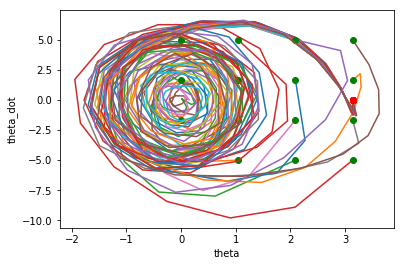

total cost:  1744.97 | 	constraint  344.14 	bad 0,  0.00
 111total cost:  1744.32 | 	constraint  344.19 	bad 0,  0.00
 112total cost:  1743.70 | 	constraint  344.24 	bad 0,  0.00
 113total cost:  1742.73 | 	constraint  344.52 	bad 0,  0.00
 114total cost:  1741.66 | 	constraint  344.40 	bad 0,  0.00
 115total cost:  1738.32 | 	constraint  345.88 	bad 3,  0.38
 116total cost:  1735.69 | 	constraint  346.75 	bad 11,  2.28
 117total cost:  1726.68 | 	constraint  341.87 	bad 0,  0.00
 118total cost:  1716.69 | 	constraint  340.62 	bad 1,  0.12
 119total cost:  1699.95 | 	constraint  340.55 	bad 4,  0.59
 120total cost:  1692.82 | 	constraint  338.32 	bad 0,  0.00
 121

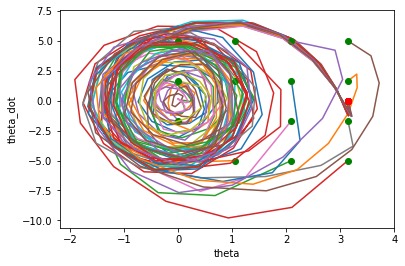

total cost:  1682.70 | 	constraint  339.37 	bad 3,  0.38
 122total cost:  1678.09 | 	constraint  338.20 	bad 0,  0.00
 123total cost:  1673.05 | 	constraint  338.71 	bad 1,  0.15
 124total cost:  1671.38 | 	constraint  338.01 	bad 0,  0.00
 125total cost:  1668.58 | 	constraint  338.72 	bad 1,  0.10
 126total cost:  1667.61 | 	constraint  338.32 	bad 0,  0.00
 127total cost:  1666.63 | 	constraint  338.50 	bad 0,  0.00
 128total cost:  1665.93 | 	constraint  338.61 	bad 0,  0.00
 129total cost:  1665.45 | 	constraint  338.56 	bad 0,  0.00
 130total cost:  1664.93 | 	constraint  339.86 	bad 0,  0.00
 131total cost:  1663.82 | 	constraint  339.08 	bad 0,  0.00
 132

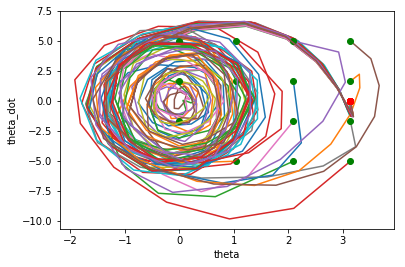

total cost:  1663.57 | 	constraint  338.71 	bad 0,  0.00
 133total cost:  1662.41 | 	constraint  338.32 	bad 0,  0.00
 134total cost:  1661.65 | 	constraint  338.14 	bad 0,  0.00
 135total cost:  1661.10 | 	constraint  338.19 	bad 0,  0.00
 136total cost:  1660.25 | 	constraint  338.14 	bad 0,  0.00
 137total cost:  1659.54 | 	constraint  338.24 	bad 0,  0.00
 138total cost:  1659.17 | 	constraint  338.28 	bad 0,  0.00
 139total cost:  1658.21 | 	constraint  338.30 	bad 0,  0.00
 140total cost:  1657.76 | 	constraint  338.21 	bad 0,  0.00
 141total cost:  1658.19 | 	constraint  338.08 	bad 0,  0.00
 142total cost:  1657.31 | 	constraint  338.13 	bad 0,  0.00
 143

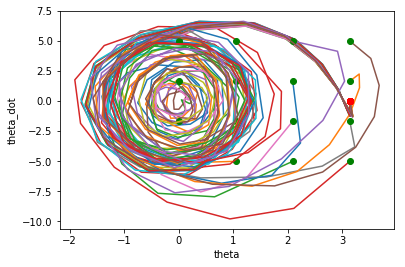

total cost:  1656.68 | 	constraint  338.15 	bad 0,  0.00
 144total cost:  1656.33 | 	constraint  338.16 	bad 0,  0.00
 145total cost:  1655.93 | 	constraint  338.34 	bad 0,  0.00
 146total cost:  1655.49 | 	constraint  338.42 	bad 0,  0.00
 147total cost:  1655.39 | 	constraint  338.80 	bad 0,  0.00
 148total cost:  1654.94 | 	constraint  338.69 	bad 0,  0.00
 149total cost:  1654.74 | 	constraint  338.72 	bad 0,  0.00
 150total cost:  1654.33 | 	constraint  338.75 	bad 0,  0.00
 151total cost:  1654.12 | 	constraint  339.01 	bad 0,  0.00
 152total cost:  1653.86 | 	constraint  339.02 	bad 0,  0.00
 153total cost:  1653.73 | 	constraint  339.30 	bad 0,  0.00
 154

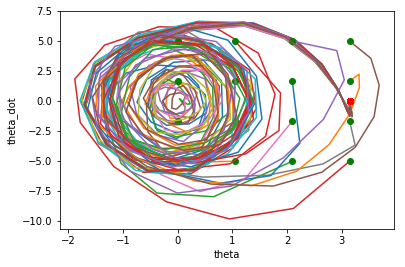

total cost:  1653.39 | 	constraint  339.16 	bad 0,  0.00
 155total cost:  1653.21 | 	constraint  339.22 	bad 0,  0.00
 156total cost:  1653.25 | 	constraint  339.17 	bad 0,  0.00
 157total cost:  1653.14 | 	constraint  339.20 	bad 0,  0.00
 158total cost:  1653.05 | 	constraint  339.19 	bad 0,  0.00
 159total cost:  1652.92 | 	constraint  339.21 	bad 0,  0.00
 160total cost:  1652.92 | 	constraint  339.21 	bad 0,  0.00
TOTAL ELAPSED TIME: 121.023791075


SolutionResult.kUnknownError

In [3]:
# Solve the mto once initialially
old_mto = make_mto()
old_mto.Solve()

using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using constraint!
using cons

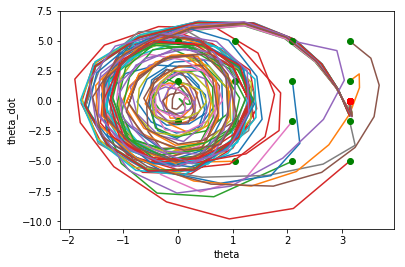

total cost:  1517.75 | 	constraint  454.95 	bad 202,  113.41
 1total cost:  1517.75 | 	constraint  454.96 	bad 202,  113.41
 2total cost:  1609.25 | 	constraint  488.66 	bad 256,  126.82
 3total cost:  1626.13 | 	constraint  525.10 	bad 301,  164.61
 4total cost:  1601.67 | 	constraint  493.09 	bad 270,  132.87
 5total cost:  1608.99 | 	constraint  503.92 	bad 280,  143.45
 6total cost:  1602.81 | 	constraint  495.05 	bad 275,  135.06
 7total cost:  1601.76 | 	constraint  493.24 	bad 271,  133.10
 8total cost:  1601.68 | 	constraint  493.10 	bad 270,  132.87
 9total cost:  1601.67 | 	constraint  493.09 	bad 270,  132.87
 10total cost:  1601.67 | 	constraint  493.09 	bad 270,  132.87
 11

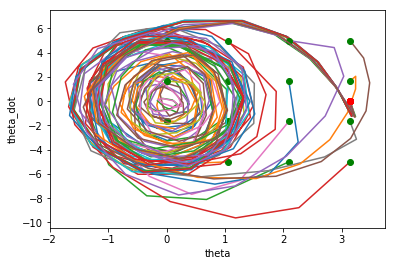

total cost:  1601.67 | 	constraint  493.09 	bad 270,  132.87
 12total cost:  1601.67 | 	constraint  493.09 	bad 270,  132.87
 13total cost:  1817.82 | 	constraint  524.23 	bad 297,  143.04
 14total cost:  1631.76 | 	constraint  488.99 	bad 266,  126.54
 15total cost:  1671.87 | 	constraint  494.75 	bad 284,  129.39
 16total cost:  1784.95 | 	constraint  539.65 	bad 303,  165.87
 17total cost:  1690.38 | 	constraint  495.81 	bad 277,  129.20
 18total cost:  1857.47 | 	constraint  584.94 	bad 297,  204.79
 19total cost:  1747.09 | 	constraint  508.11 	bad 283,  136.67
 20total cost:  1872.63 | 	constraint  538.59 	bad 293,  156.75
 21total cost:  1808.22 | 	constraint  516.22 	bad 288,  139.56
 22

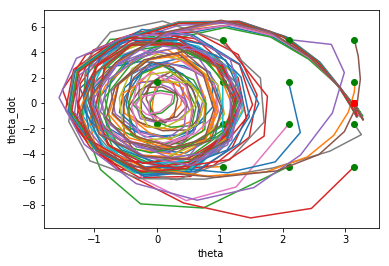

total cost:  1932.98 | 	constraint  559.53 	bad 300,  173.61
 23total cost:  1823.85 | 	constraint  516.95 	bad 287,  138.84
 24total cost:  1919.35 | 	constraint  603.98 	bad 292,  218.04
 25total cost:  1836.01 | 	constraint  518.54 	bad 287,  139.39
 26total cost:  1963.64 | 	constraint  537.37 	bad 287,  147.36
 27total cost:  1856.42 | 	constraint  519.51 	bad 287,  138.55
 28total cost:  1973.55 | 	constraint  527.02 	bad 287,  136.90
 29total cost:  1879.22 | 	constraint  519.89 	bad 286,  137.00
 30total cost:  2082.82 | 	constraint  550.33 	bad 299,  154.00
 31total cost:  1961.09 | 	constraint  525.79 	bad 285,  136.84
 32total cost:  2032.47 | 	constraint  536.62 	bad 288,  142.84
 33

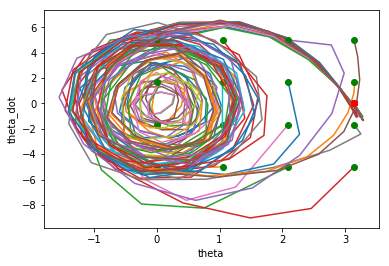

total cost:  1970.75 | 	constraint  525.67 	bad 284,  135.91
 34total cost:  2008.83 | 	constraint  532.50 	bad 282,  139.85
 35total cost:  1993.19 | 	constraint  527.67 	bad 284,  136.35
 36total cost:  2008.43 | 	constraint  532.35 	bad 282,  139.73
 37total cost:  2008.83 | 	constraint  532.50 	bad 282,  139.85
 38total cost:  2008.83 | 	constraint  532.50 	bad 282,  139.85
 39total cost:  2055.17 | 	constraint  542.81 	bad 287,  148.26
 40total cost:  2014.10 | 	constraint  532.27 	bad 282,  139.35
 41total cost:  2034.28 | 	constraint  529.12 	bad 284,  135.20
 42total cost:  2096.76 | 	constraint  530.19 	bad 282,  131.81
 43total cost:  2057.08 | 	constraint  528.89 	bad 283,  133.31
 44

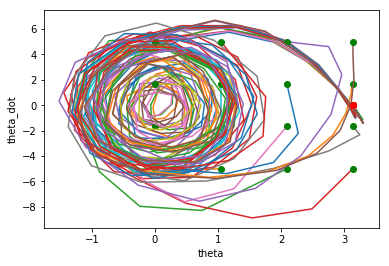

total cost:  2077.11 | 	constraint  528.80 	bad 280,  131.69
 45total cost:  2101.90 | 	constraint  528.57 	bad 283,  131.14
 46total cost:  2108.29 | 	constraint  524.48 	bad 283,  126.72
 47total cost:  2104.46 | 	constraint  524.36 	bad 275,  127.43
 48total cost:  2094.75 | 	constraint  519.91 	bad 274,  125.13
 49total cost:  2091.86 | 	constraint  516.13 	bad 279,  123.49
 50total cost:  2256.71 | 	constraint  532.15 	bad 286,  123.52
 51total cost:  2107.56 | 	constraint  504.78 	bad 263,  109.70
 52total cost:  2092.34 | 	constraint  516.13 	bad 279,  123.44
 53total cost:  2093.66 | 	constraint  515.98 	bad 277,  122.94
 54total cost:  2092.73 | 	constraint  516.11 	bad 278,  123.27
 55

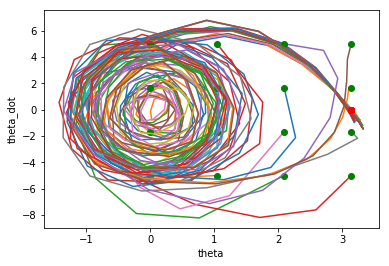

total cost:  2092.50 | 	constraint  516.12 	bad 279,  123.41
 56total cost:  2092.37 | 	constraint  516.13 	bad 279,  123.44
 57total cost:  2092.34 | 	constraint  516.13 	bad 279,  123.44
 58total cost:  2092.34 | 	constraint  516.13 	bad 279,  123.44
 59total cost:  2092.34 | 	constraint  516.13 	bad 279,  123.44
 60total cost:  2092.34 | 	constraint  516.13 	bad 279,  123.44
 61total cost:  2091.87 | 	constraint  516.08 	bad 279,  123.46
 62total cost:  2108.45 | 	constraint  504.65 	bad 262,  109.44
 63total cost:  2092.66 | 	constraint  516.13 	bad 279,  123.41
 64total cost:  2093.76 | 	constraint  516.06 	bad 277,  123.01
 65total cost:  2092.96 | 	constraint  516.13 	bad 279,  123.37
 66

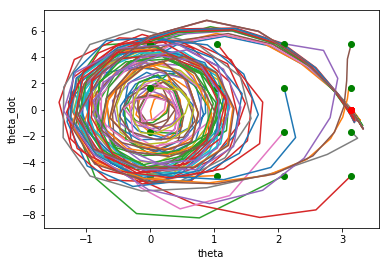

total cost:  2092.80 | 	constraint  516.13 	bad 279,  123.39
 67total cost:  2092.69 | 	constraint  516.13 	bad 279,  123.41
 68total cost:  2092.66 | 	constraint  516.13 	bad 279,  123.41
 69total cost:  2092.66 | 	constraint  516.13 	bad 279,  123.41
 70total cost:  2092.66 | 	constraint  516.13 	bad 279,  123.41
 71total cost:  2092.66 | 	constraint  516.13 	bad 279,  123.41
 72total cost:  2092.65 | 	constraint  516.13 	bad 279,  123.41
 73total cost:  2114.85 | 	constraint  505.78 	bad 266,  109.96
 74total cost:  2093.04 | 	constraint  516.14 	bad 279,  123.37
 75total cost:  2094.45 | 	constraint  515.98 	bad 277,  122.85
 76total cost:  2093.41 | 	constraint  516.13 	bad 278,  123.22
 77

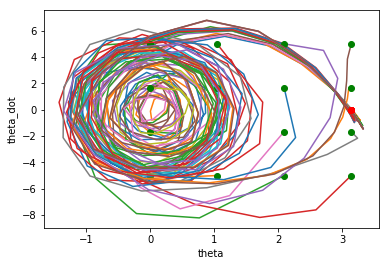

total cost:  2093.22 | 	constraint  516.14 	bad 278,  123.25
 78total cost:  2093.09 | 	constraint  516.14 	bad 279,  123.37
 79total cost:  2093.04 | 	constraint  516.14 	bad 279,  123.37
 80total cost:  2093.04 | 	constraint  516.14 	bad 279,  123.37
 81total cost:  2093.04 | 	constraint  516.14 	bad 279,  123.37
 82total cost:  2093.04 | 	constraint  516.14 	bad 279,  123.37
 83total cost:  2092.99 | 	constraint  516.14 	bad 279,  123.38
 84total cost:  2118.76 | 	constraint  502.88 	bad 266,  106.61
 85total cost:  2093.53 | 	constraint  516.16 	bad 278,  123.23
 86total cost:  2095.27 | 	constraint  516.00 	bad 277,  122.78
 87total cost:  2094.00 | 	constraint  516.15 	bad 278,  123.17
 88

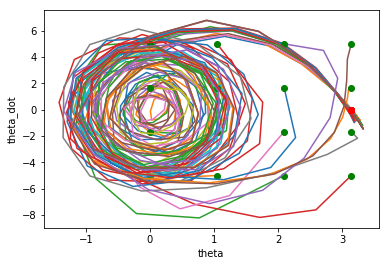

total cost:  2093.75 | 	constraint  516.15 	bad 278,  123.21
 89total cost:  2093.59 | 	constraint  516.16 	bad 278,  123.23
 90total cost:  2093.54 | 	constraint  516.16 	bad 278,  123.23
 91total cost:  2093.54 | 	constraint  516.16 	bad 278,  123.23
 92total cost:  2093.53 | 	constraint  516.16 	bad 278,  123.23
 93total cost:  2093.53 | 	constraint  516.16 	bad 278,  123.23
 94total cost:  2093.49 | 	constraint  516.15 	bad 278,  123.23
 95total cost:  2115.58 | 	constraint  506.76 	bad 269,  111.19
 96total cost:  2094.05 | 	constraint  516.16 	bad 278,  123.18
 97total cost:  2099.43 | 	constraint  505.86 	bad 267,  112.19
 98total cost:  2094.22 | 	constraint  516.04 	bad 278,  123.06
 99

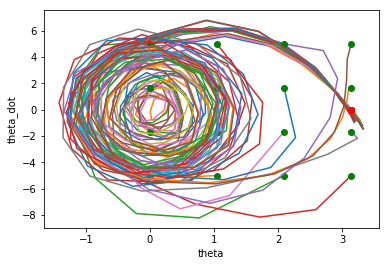

total cost:  2094.65 | 	constraint  515.35 	bad 276,  122.15
 100total cost:  2094.35 | 	constraint  515.88 	bad 276,  122.69
 101total cost:  2094.27 | 	constraint  515.98 	bad 277,  122.90
 102total cost:  2094.23 | 	constraint  516.03 	bad 278,  123.05
 103total cost:  2094.22 | 	constraint  516.04 	bad 278,  123.06
 104total cost:  2094.22 | 	constraint  516.04 	bad 278,  123.06
 105total cost:  2094.22 | 	constraint  516.04 	bad 278,  123.06
 106total cost:  2094.22 | 	constraint  516.04 	bad 278,  123.06
 107total cost:  2095.32 | 	constraint  516.11 	bad 277,  122.89
 108total cost:  2098.26 | 	constraint  503.94 	bad 263,  109.97
 109total cost:  2094.35 | 	constraint  515.96 	bad 276,  122.77
 110

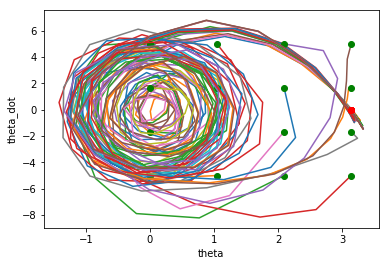

total cost:  2094.68 | 	constraint  515.61 	bad 276,  122.41
 111total cost:  2094.45 | 	constraint  515.87 	bad 276,  122.68
 112total cost:  2094.39 | 	constraint  515.93 	bad 276,  122.74
 113total cost:  2094.35 | 	constraint  515.96 	bad 276,  122.76
 114total cost:  2094.35 | 	constraint  515.96 	bad 276,  122.77
 115total cost:  2094.35 | 	constraint  515.96 	bad 276,  122.77
 116total cost:  2094.35 | 	constraint  515.96 	bad 276,  122.77
 117total cost:  2094.35 | 	constraint  515.96 	bad 276,  122.77
 118total cost:  2094.36 | 	constraint  515.96 	bad 276,  122.76
 119total cost:  2101.65 | 	constraint  511.66 	bad 277,  118.13
 120total cost:  2094.38 | 	constraint  515.96 	bad 276,  122.76
 121

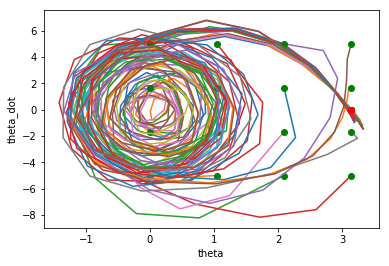

total cost:  2094.63 | 	constraint  515.90 	bad 277,  122.79
 122total cost:  2094.43 | 	constraint  515.95 	bad 276,  122.75
 123total cost:  2094.40 | 	constraint  515.95 	bad 276,  122.76
 124total cost:  2094.39 | 	constraint  515.95 	bad 276,  122.76
 125total cost:  2094.38 | 	constraint  515.96 	bad 276,  122.76
 126total cost:  2094.38 | 	constraint  515.96 	bad 276,  122.76
 127total cost:  2094.38 | 	constraint  515.96 	bad 276,  122.76
 128total cost:  2094.38 | 	constraint  515.96 	bad 276,  122.76
 129total cost:  2122.22 | 	constraint  529.34 	bad 282,  135.00
 130total cost:  2094.53 | 	constraint  515.93 	bad 276,  122.73
 131total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 132

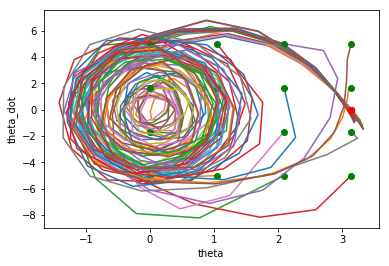

total cost:  2094.48 | 	constraint  515.94 	bad 276,  122.74
 133total cost:  2094.45 | 	constraint  515.94 	bad 276,  122.74
 134total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 135total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 136total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 137total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 138total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 139total cost:  2094.44 | 	constraint  515.94 	bad 276,  122.75
 140total cost:  2096.37 | 	constraint  511.26 	bad 278,  118.25
 141total cost:  2094.48 | 	constraint  515.93 	bad 276,  122.73
 142total cost:  2094.62 | 	constraint  515.86 	bad 277,  122.75
 143

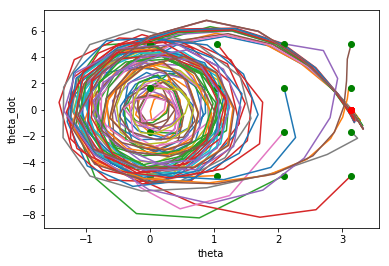

total cost:  2094.52 | 	constraint  515.92 	bad 277,  122.82
 144total cost:  2094.50 | 	constraint  515.93 	bad 276,  122.73
 145total cost:  2094.49 | 	constraint  515.93 	bad 276,  122.73
 146total cost:  2094.48 | 	constraint  515.93 	bad 276,  122.73
 147total cost:  2094.48 | 	constraint  515.93 	bad 276,  122.73
 148total cost:  2094.48 | 	constraint  515.93 	bad 276,  122.73
 149total cost:  2094.48 | 	constraint  515.93 	bad 276,  122.73
 150total cost:  2094.49 | 	constraint  515.93 	bad 276,  122.74
 151total cost:  2096.14 | 	constraint  512.17 	bad 278,  119.16
 152total cost:  2094.53 | 	constraint  515.92 	bad 276,  122.72
 153total cost:  2094.67 | 	constraint  515.83 	bad 277,  122.73
 154

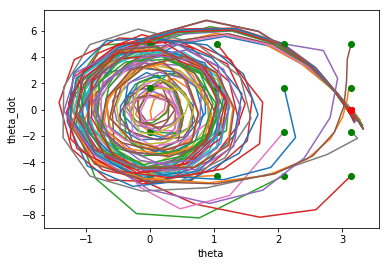

total cost:  2094.57 | 	constraint  515.90 	bad 277,  122.80
 155total cost:  2094.55 | 	constraint  515.91 	bad 277,  122.81
 156total cost:  2094.53 | 	constraint  515.92 	bad 277,  122.82
 157total cost:  2094.53 | 	constraint  515.92 	bad 276,  122.72
 158total cost:  2094.53 | 	constraint  515.92 	bad 276,  122.72
 159total cost:  2094.53 | 	constraint  515.92 	bad 276,  122.72
 160total cost:  2094.53 | 	constraint  515.92 	bad 276,  122.72
 161total cost:  2094.53 | 	constraint  515.92 	bad 276,  122.72
TOTAL ELAPSED TIME: 122.567054033


SolutionResult.kUnknownError

In [5]:
# Then resolve again with (potentially different settings, but using the previous answer as a warm start)
new_mto = make_mto()

# Warm start...
old_mto_dec_vals = old_mto.prog.GetSolution(old_mto.prog.decision_variables())
new_mto.prog.SetInitialGuessForAllVariables(old_mto_dec_vals)

new_mto.Solve()

[0, 0, 0]


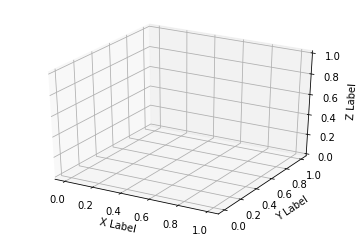

In [23]:
# Let's plot all the u's on the z axis and x (theta, theta_dot) on the y and x axes...
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = [], [], []
for ti in range(new_mto.num_trajectories):
    h_sol  = new_mto.prog.GetSolution(new_mto.h[ti])[0]
    print(h_sol)

    t_s = [h_sol*i for i in range(new_mto.num_samples)]
    x_s  = new_mto.prog.GetSolution(new_mto.x[ti])
    u_s    = new_mto.prog.GetSolution(new_mto.u[ti])
    x_trajectory = PiecewisePolynomial.Cubic(t_s, x_s, False)
#     t_samples = np.linspace(breaks[0], breaks[-1], 100) 
#     x_samples = np.hstack([x_trajectory.value(t) for t in t_samples])
    thetas, theta_dots = zip(*x_s)
    print(thetas, theta_dots, u_s)
    xs += thetas
    ys += theta_dots
    zs += u_s
print(list((len(thing) for thing in (xs, ys, zs))))
ax.scatter(xs, ys, zs, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

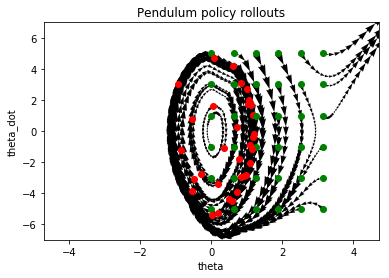

In [13]:
import math
ic_list = initial_conditions_grid(36, (0, math.pi), (-5, 5))
new_mto.plot_all_policies("state_quiver", ic_list)

In [14]:
from nn_system.NNSystemHelper import create_nn
kNetConstructor = lambda: FCBIG(2)
nn = create_nn(kNetConstructor, list(new_mto.prog.GetSolution(new_mto.T)))
list(nn.parameters())

[Parameter containing:
 tensor([[-3.3512e+00, -2.3359e-01],
         [ 4.2580e-01, -8.2241e-01],
         [-1.3982e+01,  2.0918e+00],
         [-1.2608e+01, -1.2959e+00],
         [-2.6963e-01,  2.3004e-02],
         [-2.1693e-01, -1.0048e-02],
         [-1.0597e+00,  8.1029e-02],
         [-1.1104e+01,  1.7718e+00]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8590, -4.2683,  1.7292,  3.3363, -0.6764, -1.1124, -4.1258,  1.4944],
        requires_grad=True),
 Parameter containing:
 tensor([[ 6.2567,  2.4862, -5.3782, -1.2467, -0.2494,  0.1697, -1.6101,  6.2733]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4968], requires_grad=True)]

In [30]:
ti = 0
mto.render_policy(ti)

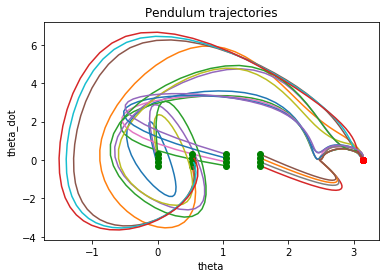

In [8]:
mto.plot_all_trajectories("state_scatter")
# mto.plot_all_trajectories("state_quiver")
# mto.plot_all_trajectories("tip_scatter")
# mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

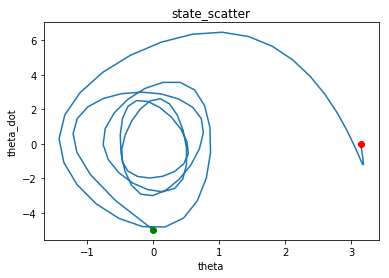

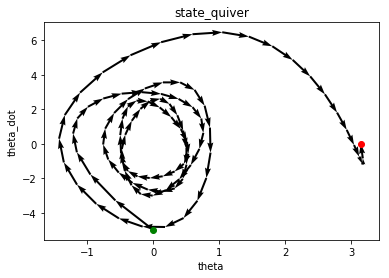

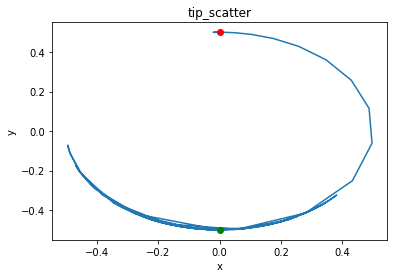

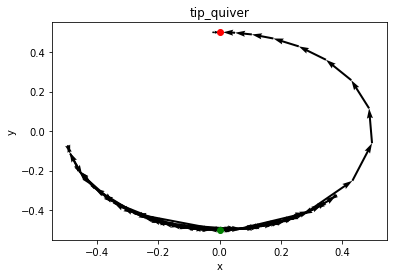

In [19]:
ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

mto.render_single_trajectory(ti)